In [2]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import random
from citipy import citipy
import time
from datetime import datetime

# Add api_key
from config import weather_api_key

# Create initial URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key


In [3]:
#Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#Add lats and longs to a list

coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities
cities = []

#Identify neares city for each lat and long pair
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count,
len(cities)

647

In [6]:
# Initialize empty list to hold weather data
city_data = []

# Print beginning of the logging

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create Counters.

record_count = 1
set_count = 1

# Loop through cities list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    #Add 1 to the record count.
    
    record_count += 1
    
    # Run an API request for each of the cities.
    
    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information to city_data list
        
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
    
    # If an error is experienced, skip this city
    
    except:
        
        print("City not found. Skipping...")
    pass
    
# Indicate Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | burica
City not found. Skipping...
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | ishigaki
Processing Record 5 of Set 1 | fort saint james
Processing Record 6 of Set 1 | marcona
City not found. Skipping...
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | jamay
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | hoquiam
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | iquique
Processing Record 16 of Set 1 | oranjemund
Processing Record 17 of Set 1 | kavant
City not found. Skipping...
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | chagda
City not found. Skipping...
Processing Record 20 o

Processing Record 35 of Set 4 | phan thiet
Processing Record 36 of Set 4 | mangaratiba
Processing Record 37 of Set 4 | katsuura
Processing Record 38 of Set 4 | balao
Processing Record 39 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 40 of Set 4 | sibolga
Processing Record 41 of Set 4 | nan
Processing Record 42 of Set 4 | dukat
Processing Record 43 of Set 4 | henties bay
Processing Record 44 of Set 4 | namatanai
Processing Record 45 of Set 4 | clyde river
Processing Record 46 of Set 4 | parabel
Processing Record 47 of Set 4 | tamisan
Processing Record 48 of Set 4 | gijon
Processing Record 49 of Set 4 | darhan
Processing Record 50 of Set 4 | egvekinot
Processing Record 1 of Set 5 | buchanan
Processing Record 2 of Set 5 | sorland
Processing Record 3 of Set 5 | northam
Processing Record 4 of Set 5 | bathsheba
Processing Record 5 of Set 5 | dudinka
Processing Record 6 of Set 5 | isangel
Processing Record 7 of Set 5 | seymour
Processing Record 8 of Set 5 | nanortalik
Proc

Processing Record 27 of Set 8 | cap malheureux
Processing Record 28 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 29 of Set 8 | krasnoselkup
Processing Record 30 of Set 8 | oranjestad
Processing Record 31 of Set 8 | vanavara
Processing Record 32 of Set 8 | juan lacaze
Processing Record 33 of Set 8 | ust-nera
Processing Record 34 of Set 8 | mamontovo
Processing Record 35 of Set 8 | korem
Processing Record 36 of Set 8 | bairiki
Processing Record 37 of Set 8 | kingman
Processing Record 38 of Set 8 | corrente
Processing Record 39 of Set 8 | lugo
Processing Record 40 of Set 8 | huarmey
Processing Record 41 of Set 8 | mapiripan
Processing Record 42 of Set 8 | paamiut
Processing Record 43 of Set 8 | bahia blanca
Processing Record 44 of Set 8 | salvador
Processing Record 45 of Set 8 | honiara
Processing Record 46 of Set 8 | kaseda
Processing Record 47 of Set 8 | gouyave
Processing Record 48 of Set 8 | parole
Processing Record 49 of Set 8 | alice springs
Processing Record 50

Processing Record 14 of Set 12 | easton
Processing Record 15 of Set 12 | sakakah
Processing Record 16 of Set 12 | irtyshskiy
Processing Record 17 of Set 12 | obo
Processing Record 18 of Set 12 | qaqortoq
Processing Record 19 of Set 12 | luanda
Processing Record 20 of Set 12 | kangavar
Processing Record 21 of Set 12 | vila
Processing Record 22 of Set 12 | gat
Processing Record 23 of Set 12 | kasamwa
Processing Record 24 of Set 12 | voh
Processing Record 25 of Set 12 | flinders
Processing Record 26 of Set 12 | ust-bolsheretsk
City not found. Skipping...
Processing Record 27 of Set 12 | kannad
Processing Record 28 of Set 12 | agadir
Processing Record 29 of Set 12 | taltal
Processing Record 30 of Set 12 | lavrentiya
Processing Record 31 of Set 12 | oruro
Processing Record 32 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 33 of Set 12 | baboua
City not found. Skipping...
Processing Record 34 of Set 12 | galveston
Processing Record 35 of Set 12 | hofn
Processing Record 36

In [8]:
len(city_data)

593

In [9]:
# Create DataFrame

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,46.89,97,100,10.36,CA,2023-01-17 01:26:03
1,Tuktoyaktuk,69.4541,-133.0374,-7.60,77,75,5.75,CA,2023-01-17 01:21:36
2,Ishigaki,24.3448,124.1572,66.33,72,75,9.22,JP,2023-01-17 01:28:42
3,Fort Saint James,54.4333,-124.2500,31.57,97,100,2.24,CA,2023-01-17 01:28:43
4,Severo-Kurilsk,50.6789,156.1250,22.41,62,98,12.50,RU,2023-01-17 01:28:43
5,Rikitea,-23.1203,-134.9692,77.72,68,2,5.37,PF,2023-01-17 01:21:37
6,Jamay,20.3000,-102.7167,64.78,31,100,3.53,MX,2023-01-17 01:28:44
7,Georgetown,5.4112,100.3354,80.53,68,20,5.75,MY,2023-01-17 01:28:44
8,Hoquiam,46.9809,-123.8893,46.38,90,100,12.66,US,2023-01-17 01:28:45
9,Kodiak,57.7900,-152.4072,35.11,93,100,14.97,US,2023-01-17 01:28:45


In [10]:
#Re-order Columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Torbay,CA,2023-01-17 01:26:03,47.6666,-52.7314,46.89,97,100,10.36
1,Tuktoyaktuk,CA,2023-01-17 01:21:36,69.4541,-133.0374,-7.60,77,75,5.75
2,Ishigaki,JP,2023-01-17 01:28:42,24.3448,124.1572,66.33,72,75,9.22
3,Fort Saint James,CA,2023-01-17 01:28:43,54.4333,-124.2500,31.57,97,100,2.24
4,Severo-Kurilsk,RU,2023-01-17 01:28:43,50.6789,156.1250,22.41,62,98,12.50
5,Rikitea,PF,2023-01-17 01:21:37,-23.1203,-134.9692,77.72,68,2,5.37
6,Jamay,MX,2023-01-17 01:28:44,20.3000,-102.7167,64.78,31,100,3.53
7,Georgetown,MY,2023-01-17 01:28:44,5.4112,100.3354,80.53,68,20,5.75
8,Hoquiam,US,2023-01-17 01:28:45,46.9809,-123.8893,46.38,90,100,12.66
9,Kodiak,US,2023-01-17 01:28:45,57.7900,-152.4072,35.11,93,100,14.97


In [11]:
# Create output file (CSV).

output_data_file = "weather_data/cities.csv"

#Export into CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

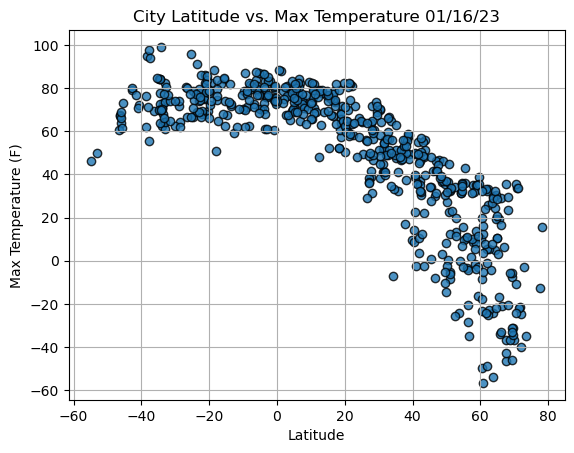

In [13]:
# Build scatter plot for latitude vs. max. temp

plt.scatter(lats,
           max_temps,
           edgecolor= "black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph properties

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure

plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

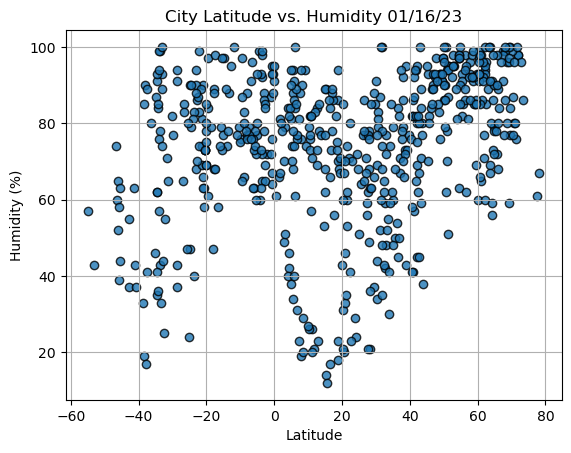

In [14]:
# Build scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor= "black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph properties

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure

plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

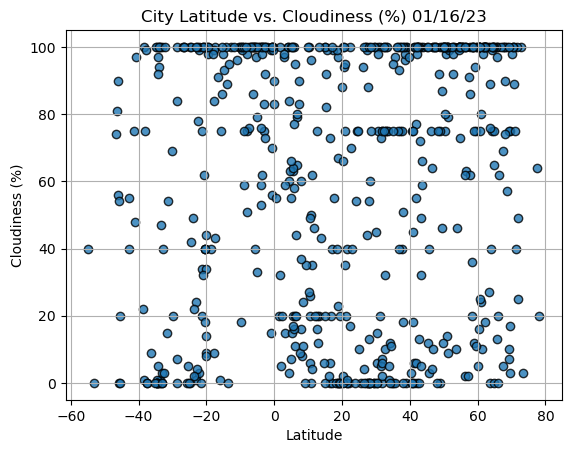

In [15]:
# Build scatter plot for latitude vs. cloudiness.

plt.scatter(lats,
           cloudiness,
           edgecolor= "black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph properties

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure

plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

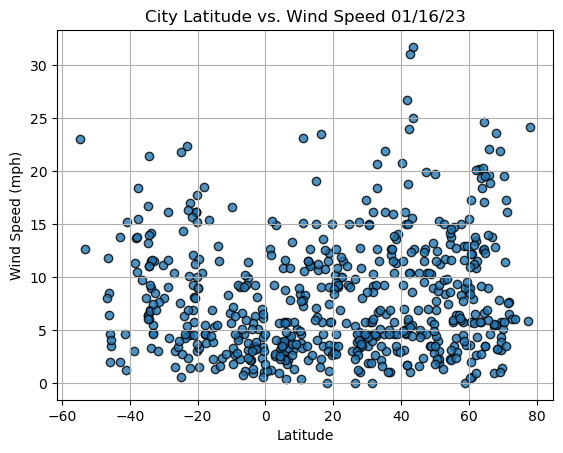

In [16]:
# Build scatter plot for latitude vs. wind speed

plt.scatter(lats,
           wind_speed,
           edgecolor= "black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph properties

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure

plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [17]:
#Import linear regression from SciPy stats module

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                   Oranjemund
Country                        NA
Date          2023-01-17 01:28:46
Lat                        -28.55
Lng                       16.4333
Max Temp                    64.27
Humidity                       94
Cloudiness                    100
Wind Speed                   4.27
Name: 13, dtype: object

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Torbay,CA,2023-01-17 01:26:03,47.6666,-52.7314,46.89,97,100,10.36
1,Tuktoyaktuk,CA,2023-01-17 01:21:36,69.4541,-133.0374,-7.60,77,75,5.75
2,Ishigaki,JP,2023-01-17 01:28:42,24.3448,124.1572,66.33,72,75,9.22
3,Fort Saint James,CA,2023-01-17 01:28:43,54.4333,-124.2500,31.57,97,100,2.24
4,Severo-Kurilsk,RU,2023-01-17 01:28:43,50.6789,156.1250,22.41,62,98,12.50


In [20]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

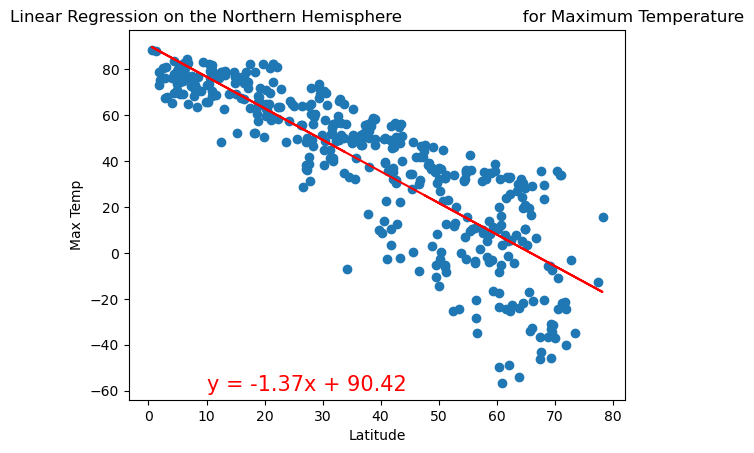

In [21]:
#Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature", "Max Temp",(10,-60))


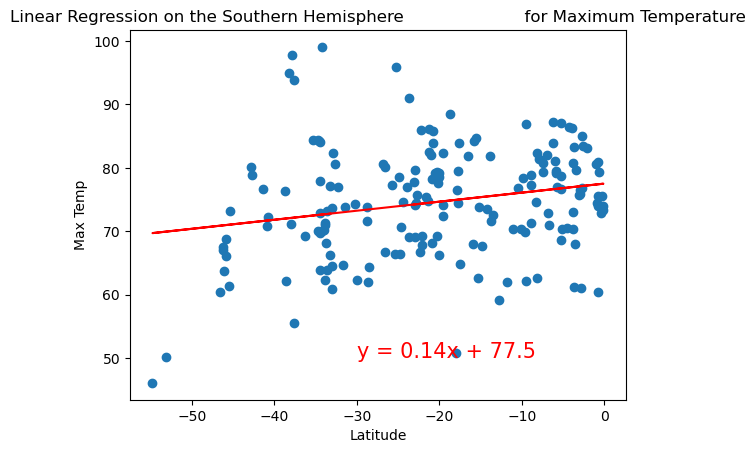

In [22]:
#Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature", "Max Temp",(-30,50))

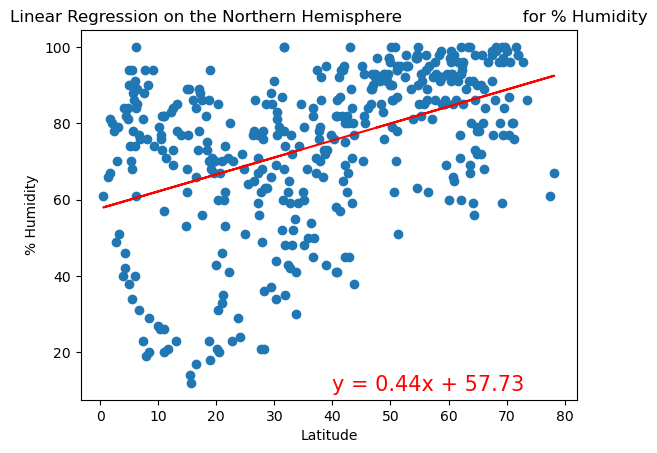

In [23]:
#Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for % Humidity", "% Humidity",(40,10))

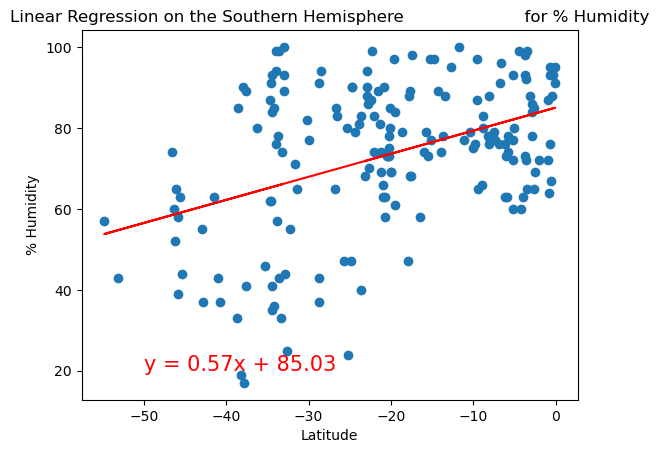

In [24]:
#Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \
                      for % Humidity", "% Humidity",(-50,20))

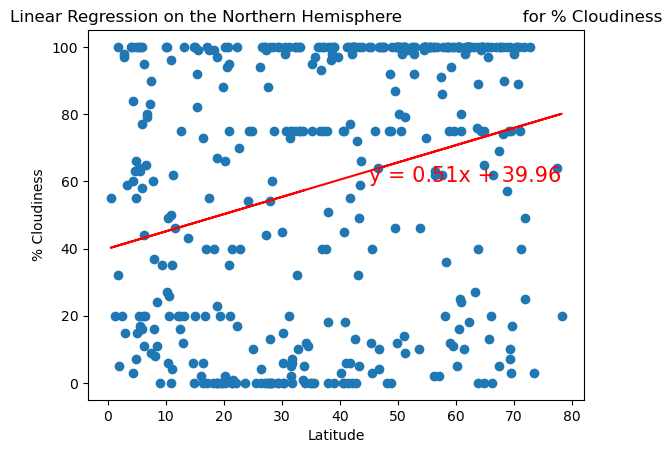

In [25]:
#Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for % Cloudiness", "% Cloudiness",(45,60))

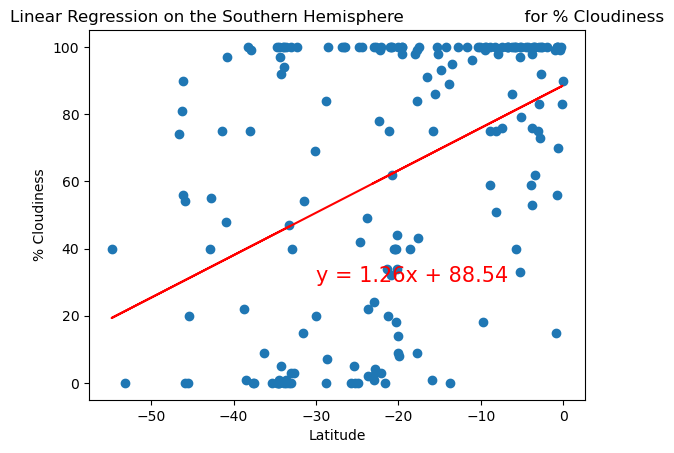

In [26]:
#Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \
                      for % Cloudiness", "% Cloudiness",(-30,30))

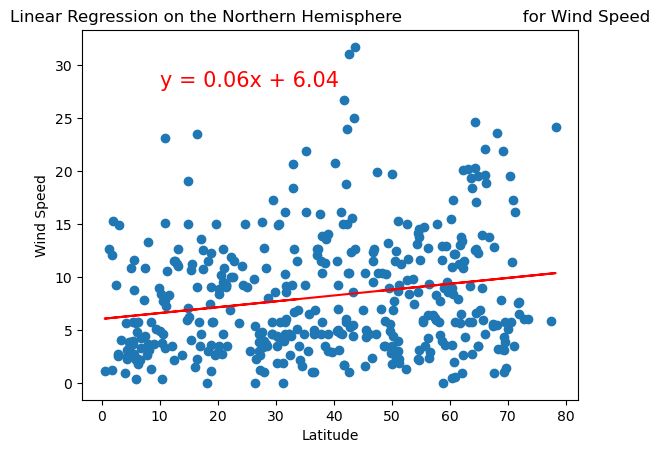

In [27]:
#Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \
                      for Wind Speed", "Wind Speed",(10,28))

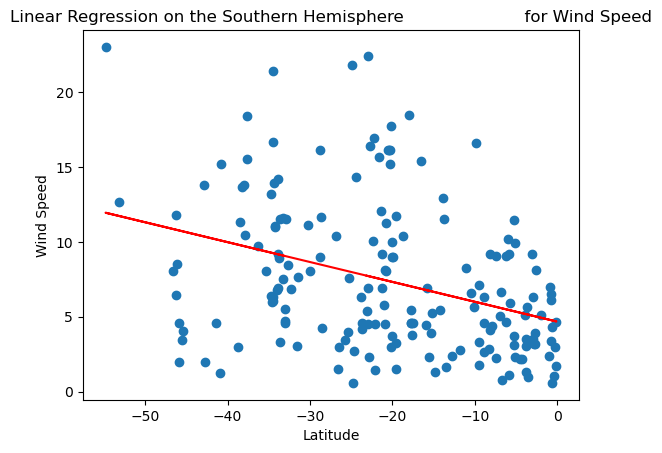

In [28]:
#Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \
                      for Wind Speed", "Wind Speed",(-25,28))